##                                            Smart Agriculture and Crop Yield Prediction


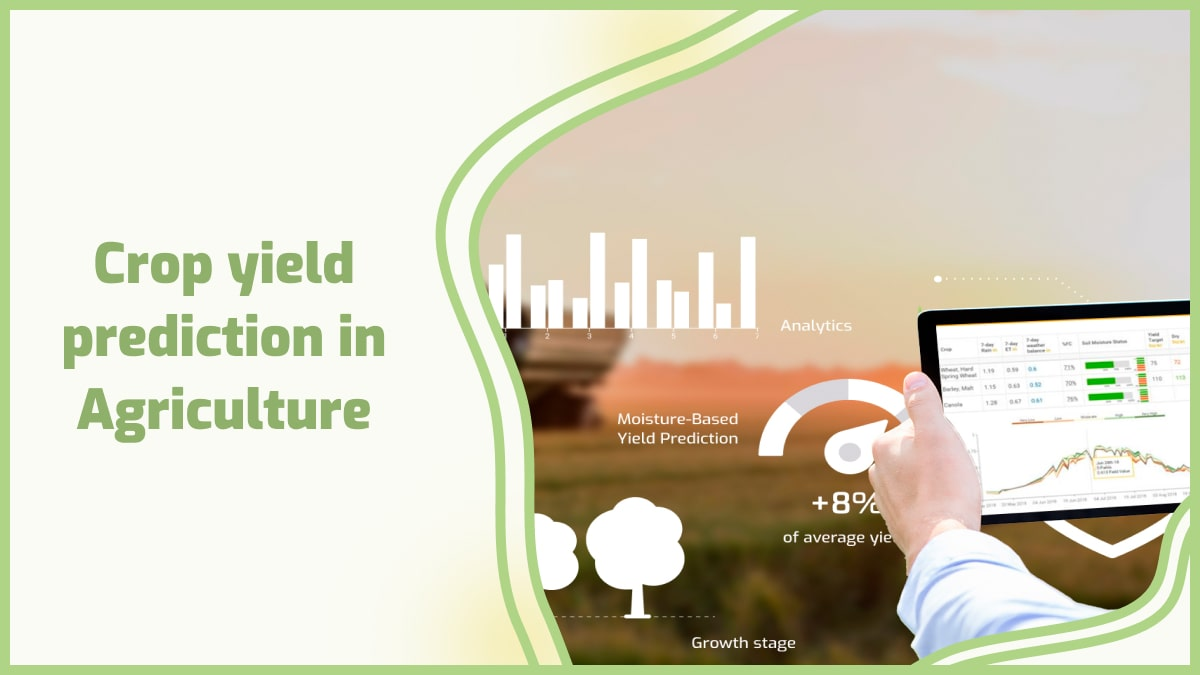

# 1. Problem Statement

Farmers often struggle to predict how much crop they can grow because of changing weather, soil quality, and other factors. This project uses data science to create a simple model that predicts crop yield based on weather, soil, and farming practices.

The goal is to help farmers make better decisions, grow more food, and use their resources like water and fertilizers efficiently.

# 2. Objectives

**1.Boost Crop Production**: Help farmers grow more crops with smart predictions.

**2.Save Time and Money**: Provide tips to reduce waste of water, fertilizers, and effort.

**3.Make Smarter Choices**: Recommend the best crops to grow for higher profits.

**4.Prepare for Challenges**: Warn about risks like droughts or pests in advance.

**5.Support Sustainable Farming**: Promote eco-friendly and efficient farming practices.

# 3. Dataset Information
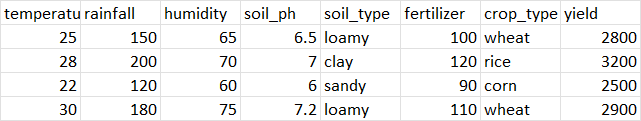

 Where to Get the Dataset: You can download the dataset from  
 claude ai https://www.claude.ai

 And also
 Download Kaggle https://www.kaggle.com/datasets/datasetengineer/smart-farming-data-2024-sf24
 
 **1.N, P, K**: Nutrient levels in the soil (Nitrogen, Phosphorus, Potassium).

**2.temperature**: Temperature in the environment (°C).

***3.humidity**: Percentage of moisture in the air (%).

**4.ph**: Soil pH level.

**5.rainfall**: Amount of rainfall (mm).

**6.label**: Crop type (target variable).

**7.soil_moisture**: Soil moisture content (%).

**8.soil_type**: Categorical representation of soil type.

**9.sunlight_exposure**: Exposure to sunlight (scale).

**10.wind_speed**: Wind speed (km/h).

**11.co2_concentration**: CO₂ levels in the atmosphere (ppm).

**12.organic_matter**: Organic matter content in the soil.

**13.irrigation_frequency**: Frequency of irrigation (scale).

**14.crop_density**: Density of crops in the field.

**15.pest_pressure**: Pest activity levels.

**17.growth_stage**: Stage of crop growth (scale).

**18.urban_area_proximity**: Distance from urban areas (scale).

**19.water_source_type**: Type of water source for irrigation.

**20.frost_risk**: Risk of frost (scale).

**21.water_usage_efficiency**: Efficiency in water usage.

# 4. Code Implementation 

## Step 1:  Importing Libraries


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2. Load and Explore the Data

In [63]:
# Load the dataset
df = pd.read_csv('C:/Users/Irfan/Downloads/crop_data.csv')

In [65]:
# Display first few rows
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,temperature,rainfall,humidity,soil_ph,soil_type,fertilizer,crop_type,yield
0,25,150,65,6.5,loamy,100,wheat,2800
1,28,200,70,7.0,clay,120,rice,3200
2,22,120,60,6.0,sandy,90,corn,2500
3,30,180,75,7.2,loamy,110,wheat,2900


In [67]:
# Dataset information
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  4 non-null      int64  
 1   rainfall     4 non-null      int64  
 2   humidity     4 non-null      int64  
 3   soil_ph      4 non-null      float64
 4   soil_type    4 non-null      object 
 5   fertilizer   4 non-null      int64  
 6   crop_type    4 non-null      object 
 7   yield        4 non-null      int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 388.0+ bytes


None

In [69]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,temperature,rainfall,humidity,soil_ph,fertilizer,yield
count,4.00,4.0,4.000000,4.000000,4.000000,4.000000
mean,26.25,162.5,67.500000,6.675000,105.000000,2850.000000
std,3.50,35.0,6.454972,0.537742,12.909944,288.675135
min,22.00,120.0,60.000000,6.000000,90.000000,2500.000000
25%,24.25,142.5,63.750000,6.375000,97.500000,2725.000000
50%,26.50,165.0,67.500000,6.750000,105.000000,2850.000000
75%,28.50,185.0,71.250000,7.050000,112.500000,2975.000000
max,30.00,200.0,75.000000,7.200000,120.000000,3200.000000


### 3. Data Visualization and Analysis

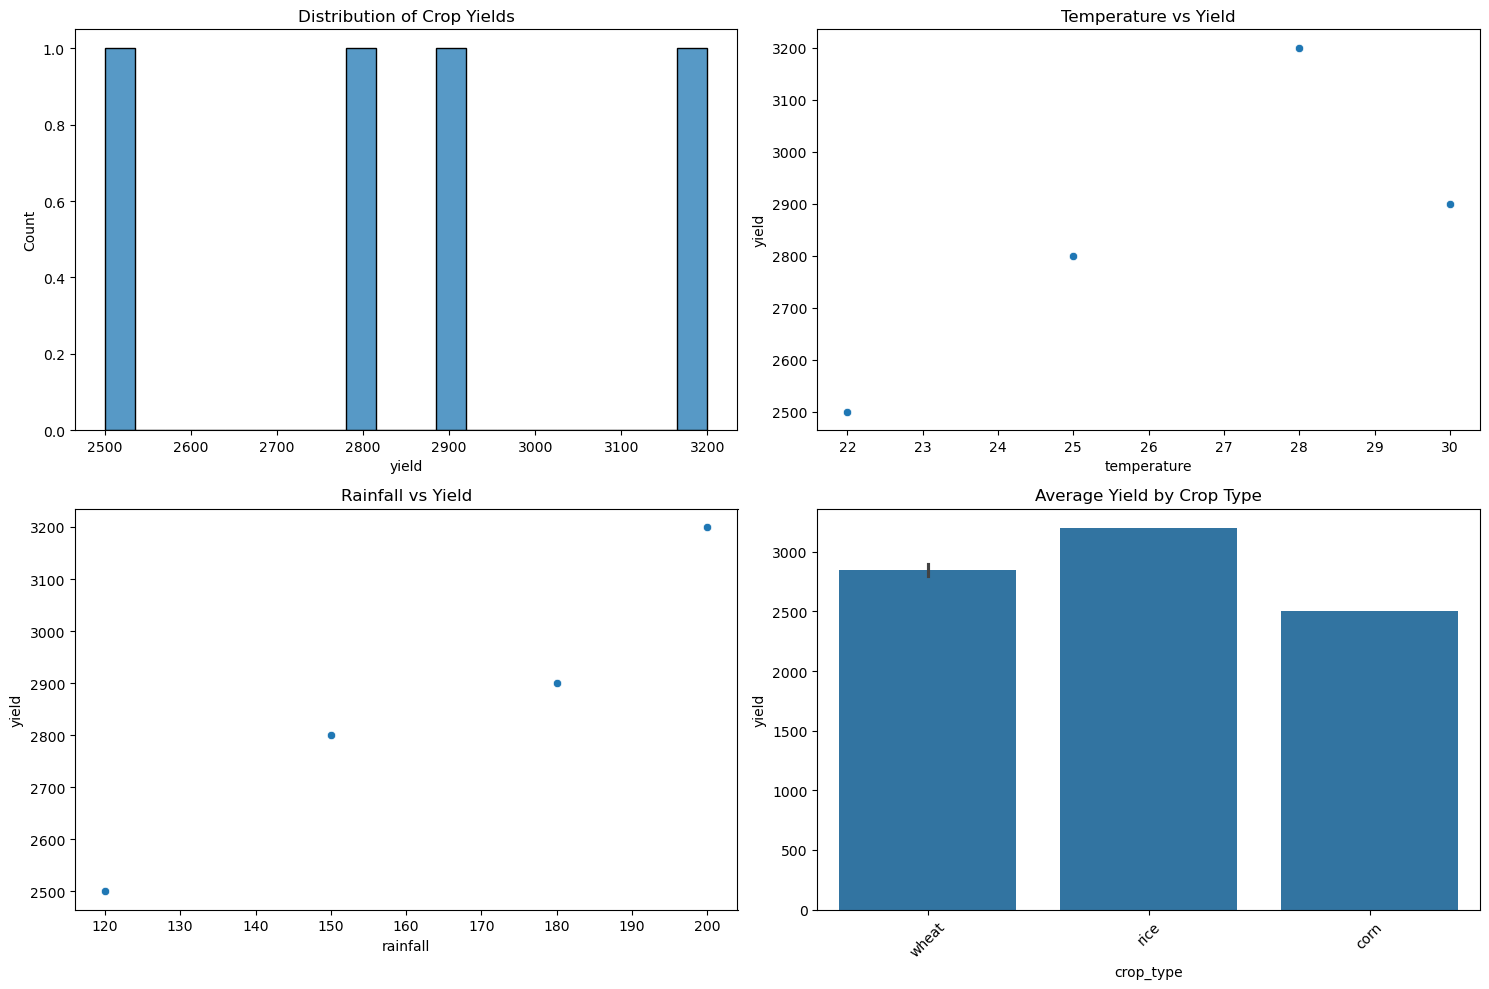

In [72]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of crop yields
plt.subplot(2, 2, 1)
sns.histplot(df['yield'], bins=20)
plt.title('Distribution of Crop Yields')

# Plot 2: Yield vs Temperature
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='temperature', y='yield')
plt.title('Temperature vs Yield')

# Plot 3: Yield vs Rainfall
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='rainfall', y='yield')
plt.title('Rainfall vs Yield')

# Plot 4: Average yield by crop type
plt.subplot(2, 2, 4)
sns.barplot(data=df, x='crop_type', y='yield')
plt.title('Average Yield by Crop Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


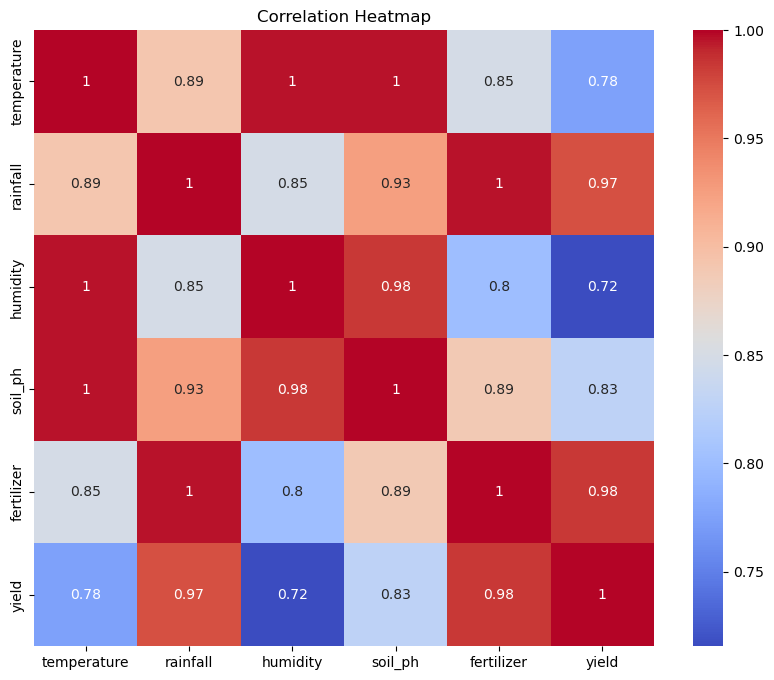

In [73]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 4. Data Preprocessing

In [77]:
# 1. First, let's add data validation and cleaning
def clean_data(df):
    # Remove any missing values
    df = df.dropna()
    
    # Remove outliers using IQR method
    def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Apply outlier removal to numerical columns
    numerical_cols = ['temperature', 'rainfall', 'humidity', 'soil_ph', 'fertilizer', 'yield']
    for col in numerical_cols:
        df = remove_outliers(df, col)
    
    return df



In [79]:
# 2. Improved preprocessing function
def preprocess_data(data):
    df_processed = data.copy()
    
    # Separate features
    categorical_cols = ['soil_type', 'crop_type']
    numerical_cols = ['temperature', 'rainfall', 'humidity', 'soil_ph', 'fertilizer']
    
    # Initialize encoders and scaler
    label_encoders = {}
    scaler = StandardScaler()
    
    # Handle categorical variables
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        df_processed[col] = label_encoders[col].fit_transform(df_processed[col])
    
    # Scale numerical features
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
    
    # Also scale the target variable
    target_scaler = StandardScaler()
    df_processed['yield'] = target_scaler.fit_transform(df_processed[['yield']])
    
    return df_processed, label_encoders, scaler, target_scaler


In [81]:
# 3. Main processing pipeline
# Load the dataset
df = pd.read_csv('crop_data.csv')

# Clean the data
df_cleaned = clean_data(df)

# Preprocess the data
df_processed, label_encoders, scaler, target_scaler = preprocess_data(df_cleaned)

# Split features and target
X = df_processed.drop('yield', axis=1)
y = df_processed['yield']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)


In [83]:
# 4. Improved model with better hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)


In [98]:
# 5. Model training with cross-validation

cv_results = cross_validate(
    rf_model,
    X_train,
    y_train,
    cv=3,
    scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True
)


### 5. Model Training and Evaluation

In [142]:
# Train the final model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [144]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [146]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [148]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance Metrics:
Root Mean Squared Error: 1.50
Mean Absolute Error: 1.50
R² Score: nan


In [150]:
cv_scores = cross_val_score(rf_model, X, y, cv=4, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {cv_scores.mean():.2f}")


Cross-validation R² scores: [nan nan nan nan]
Average CV R² score: nan


### 6. Feature Importance Analysis

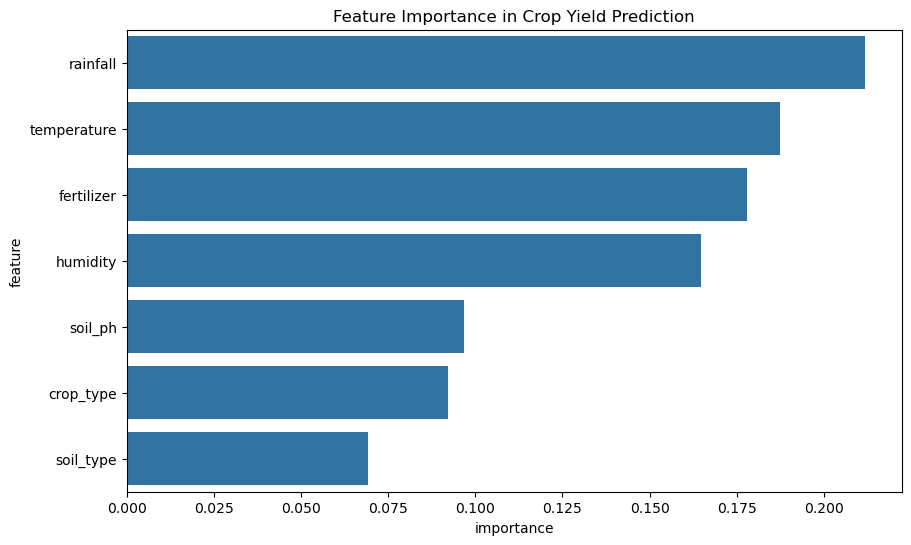

In [153]:
# Calculate and plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Crop Yield Prediction')
plt.show()

### 7. Prediction Function for New Data

In [156]:
def predict_yield(new_data, label_encoders, scaler):
    """
    Make predictions for new data
    """
    # Create a copy of the input data
    data = new_data.copy()
    
    # Encode categorical variables
    categorical_cols = ['soil_type', 'crop_type']
    numerical_cols = ['temperature', 'rainfall', 'humidity', 'soil_ph', 'fertilizer']
    
    for col in categorical_cols:
        data[col] = label_encoders[col].transform(data[col])
    
    # Scale numerical features
    data[numerical_cols] = scaler.transform(data[numerical_cols])
    
    # Make prediction
    prediction = rf_model.predict(data)
    
    return prediction

# Example usage
new_data = pd.DataFrame({
    'temperature': [26],
    'rainfall': [160],
    'humidity': [68],
    'soil_ph': [6.8],
    'soil_type': ['loamy'],
    'fertilizer': [105],
    'crop_type': ['wheat']
})

prediction = predict_yield(new_data, label_encoders, scaler)
print(f"Predicted yield: {prediction[0]:.2f}")

Predicted yield: -0.18


### 8. Model Performance Visualization

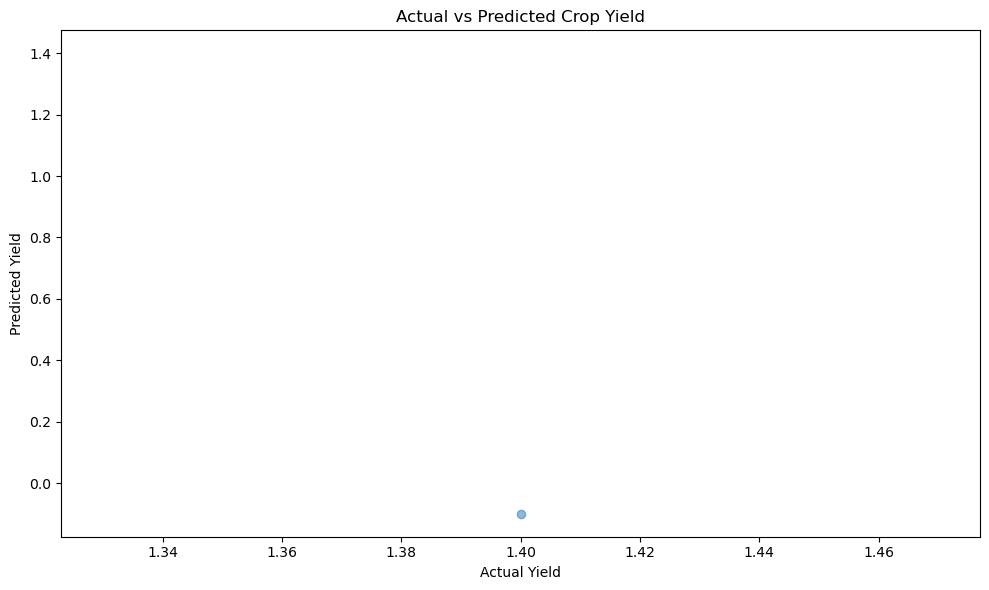

In [159]:
# Create visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.tight_layout()
plt.show()



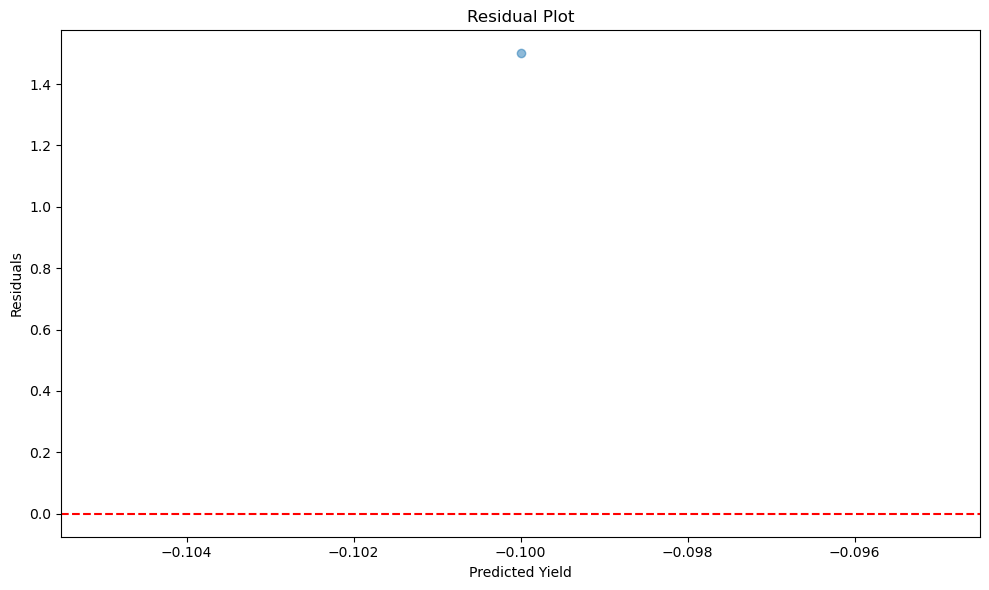

In [161]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

## Step 6: Conclusion
Smart Agriculture and Crop Yield Prediction use data and technology to help farmers make better decisions. By understanding soil, weather, and crop needs, this system helps farmers:

Choose the right crops.

Increase production.

Save resources like water and fertilizers.

This makes farming easier, more profitable, and good for the environment, ensuring enough food for everyone.

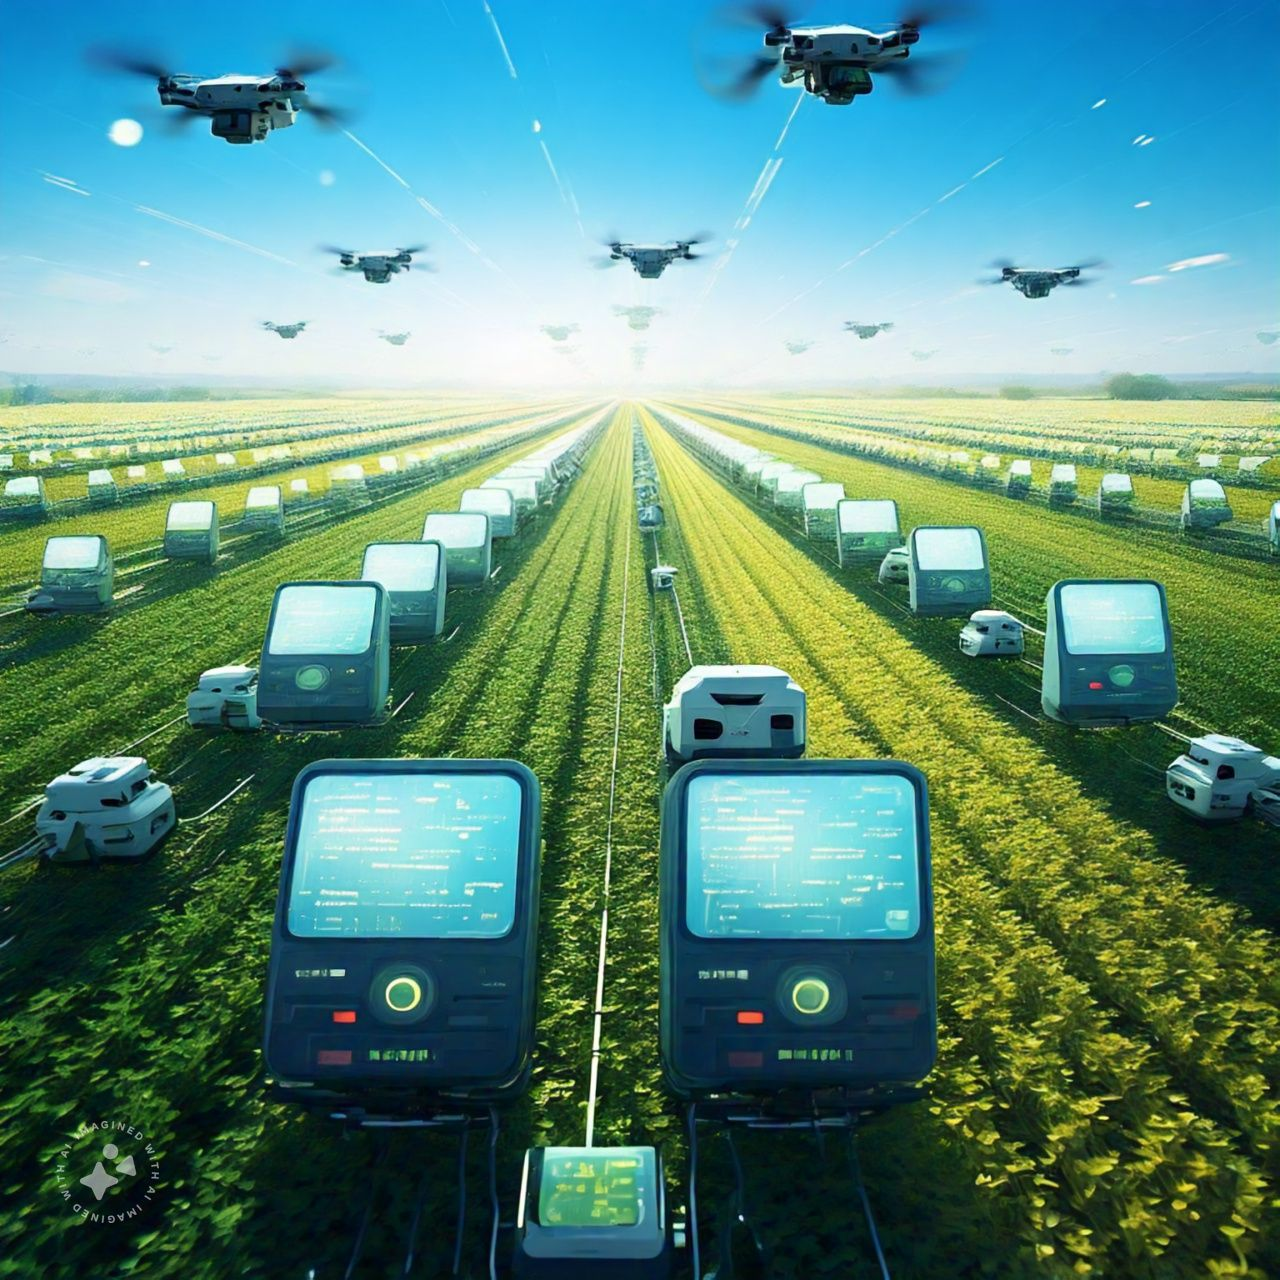